# Cleaning and transforming data

Files needed = ('atussum_2017.dat', 'movie_merged.csv')

In this notebook we will continue practicing techniques for manipulating data into forms that are amenable to analysis. We will cover: 

1. `.replace()` and `unique()` for recoding variables
2. `.map()` and `.applymap()` for working element-wise on DataFrames
3. String methods for working with strings in DataFrames
4. `.cut()` and `.qcut()` for discretizing continuous variables

We will also learn about the American Time Use Survey. 

In [1]:
import pandas as pd                 # pandas for data handling
import matplotlib.pyplot as plt     # matplotlib for plots
import numpy as np                  # numpy for numerical methods 

## American Time Use Survey (ATUS)
The Bureau of Labor Statistics oversees the [American Time Use Survey](https://www.bls.gov/tus/), which asks a sample of Americans to complete detailed diaries keeping track of each minute of their day. 

Follow this link [https://www.bls.gov/tus/datafiles_2017.htm](https://www.bls.gov/tus/datafiles_2017.htm) to the page for the 2017 survey. Download the **ATUS 2017 Activity summary file (zip)** file located in the **2017 Basic ATUS Data Files** section of the page. Alternatively, download it directly [https://www.bls.gov/tus/special.requests/atussum_2017.zip](https://www.bls.gov/tus/special.requests/atussum_2017.zip). 

Unzip the file. We are looking for `atussum_2017.dat`. It is a coma separated file. Let's get it loaded.

In [2]:
atus = pd.read_csv('atussum_2017.dat')

In [3]:
atus.head()

,TUCASEID,TUFINLWGT,TRYHHCHILD,TEAGE,TESEX,PEEDUCA,PTDTRACE,PEHSPNON,GTMETSTA,TELFS,...,t181601,t181699,t181801,t181899,t189999,t500101,t500103,t500105,t500106,t500107
0,20170101170002,5.217551e+06,15,34,2,39,2,2,1,1,...,0,0,0,0,0,0,0,0,0,0
1,20170101170012,3.106847e+06,7,28,2,40,1,2,1,5,...,0,0,0,0,0,0,0,0,0,0
2,20170101170027,1.653409e+07,15,15,1,35,3,2,1,5,...,0,0,0,0,0,0,0,0,0,0
3,20170101170030,1.757071e+07,-1,46,1,39,1,2,1,1,...,0,0,0,0,0,0,0,0,0,0
4,20170101170033,1.022275e+06,-1,85,1,44,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


421 variables! That's too many for us today. Let's just keep a few. 

In [4]:
col_list=atus.columns.tolist()   # columns returns a list object. Turn it into a list for easier printing.

# Print the first and last 20 variables. 
print(col_list[0:20],'\n')
print(col_list[-20:])

['TUCASEID', 'TUFINLWGT', 'TRYHHCHILD', 'TEAGE', 'TESEX', 'PEEDUCA', 'PTDTRACE', 'PEHSPNON', 'GTMETSTA', 'TELFS', 'TEMJOT', 'TRDPFTPT', 'TESCHENR', 'TESCHLVL', 'TRSPPRES', 'TESPEMPNOT', 'TRERNWA', 'TRCHILDNUM', 'TRSPFTPT', 'TEHRUSLT'] 

['t181204', 't181205', 't181299', 't181301', 't181302', 't181399', 't181401', 't181499', 't181501', 't181599', 't181601', 't181699', 't181801', 't181899', 't189999', 't500101', 't500103', 't500105', 't500106', 't500107']


The demographic variables are all uppercase letters. The time variables are of the form 'txxyyzz' where xx is the major category code, yy is the second-tier code, and zz is the third-tier code. ([docs](https://www.bls.gov/tus/lexiconnoex2017.pdf))

Let's keep some demographic data and some data about working and sleeping. 

In [5]:
vars_to_keep = ['TEAGE', 'TESEX', 'PTDTRACE', 'PEEDUCA', 'GTMETSTA', 'TELFS', 
                'TUDIARYDAY', 't050101', 't050102', 't050201', 't010101', 't010102']

atus_small = atus[vars_to_keep]

In [6]:
atus_small.head()

,TEAGE,TESEX,PTDTRACE,PEEDUCA,GTMETSTA,TELFS,TUDIARYDAY,t050101,t050102,t050201,t010101,t010102
0,34,2,2,39,1,1,1,450,0,0,728,0
1,28,2,1,40,1,5,7,0,0,0,385,0
2,15,1,3,35,1,5,4,0,0,0,570,0
3,46,1,1,39,1,1,2,480,0,0,525,0
4,85,1,1,44,1,1,7,0,0,0,756,0


Let's give the columns some more reasonable names. 

In [7]:
# See https://www.bls.gov/tus/freqvariables.pdf for frequently used variables
atus_small = atus_small.rename(columns={'TEAGE':'age', 'TESEX':'gender', 'PTDTRACE':'race', 
                           'PEEDUCA':'edu', 'GTMETSTA':'metro', 'TELFS':'employ', 'TUDIARYDAY':'day'})
atus_small.head()

,age,gender,race,edu,metro,employ,day,t050101,t050102,t050201,t010101,t010102
0,34,2,2,39,1,1,1,450,0,0,728,0
1,28,2,1,40,1,5,7,0,0,0,385,0
2,15,1,3,35,1,5,4,0,0,0,570,0
3,46,1,1,39,1,1,2,480,0,0,525,0
4,85,1,1,44,1,1,7,0,0,0,756,0


In [8]:
# See https://www.bls.gov/tus/lexiconnoex2017.pdf for definitions
atus_small = atus_small.rename(columns={'t050101':'work_main', 't050102':'work_other', 't010101':'sleep', 
                                        't050201':'work_soc', 't010102':'no_sleep'})
atus_small.head()

,age,gender,race,edu,metro,employ,day,work_main,work_other,work_soc,sleep,no_sleep
0,34,2,2,39,1,1,1,450,0,0,728,0
1,28,2,1,40,1,5,7,0,0,0,385,0
2,15,1,3,35,1,5,4,0,0,0,570,0
3,46,1,1,39,1,1,2,480,0,0,525,0
4,85,1,1,44,1,1,7,0,0,0,756,0


In [9]:
# One last check...
atus_small.dtypes

age           int64
gender        int64
race          int64
edu           int64
metro         int64
employ        int64
day           int64
work_main     int64
work_other    int64
work_soc      int64
sleep         int64
no_sleep      int64
dtype: object

Okay, we have variable names that we can live with. Let's start transforming the data to get it ready for analysis. 

### A word on loops
We have seen many places where a loop saved us time and effort. It might seem natural to use a loop to perform an operation on each element of a column or a DataFrame. 

In general, however, we want to avoid this. Instead, we have used pandas vectorized operations such as 
```python
x['new_var'] = x['var_1'] / x['var_2']
```
to perform element-wise division. Using pandas' native operations is much (much much) faster than looping over the rows of a DataFrame. A lot of optimization has been written into the native functions that is not there when we loop ourselves. If you find yourself looping over the rows of a DataFrame, take a step back and think about other ways forward. 

Fortunately, pandas provides methods that let us to very complex and very general operations to a DataFrame without resorting to a loop. We consider a few of these below. 

### replace( ) 

The gender variable is coded 1 for male and 2 for female. I do not want to have to remember that!

The `replace( )` method replaces one value for another. One syntax is 
```
atus_small['gender'] = atus_small['gender'].replace(1, 'male')
```
but a more powerful one passes a dict or a list.
```
atus_small['gender'] = atus_small['gender'].replace({1:'male', 2:'female'})
```

In [10]:
gender_codes = {1:'male', 2:'female'}
atus_small['gender'] = atus_small['gender'].replace(gender_codes)
atus_small.head()

,age,gender,race,edu,metro,employ,day,work_main,work_other,work_soc,sleep,no_sleep
0,34,female,2,39,1,1,1,450,0,0,728,0
1,28,female,1,40,1,5,7,0,0,0,385,0
2,15,male,3,35,1,5,4,0,0,0,570,0
3,46,male,1,39,1,1,2,480,0,0,525,0
4,85,male,1,44,1,1,7,0,0,0,756,0


### unique( )
Let's code race, too. What codes are in our data? The method `unique( )` returns the unique values.

In [11]:
races = atus_small['race'].unique()
races.sort()
print(races)


[ 1  2  3  4  5  6  7  8  9 10 11 13 16 18]


In [12]:
# I looked up the codes in the documentation...

race_codes = {1:'white', 2:'black', 3:'native_am', 4:'asian', 5:'hawaiian', 6:'wh_bl', 
              7:'wh_na', 8:'wh_as', 9:'wh_ha', 10:'bl_na', 11:'bl_as', 13:'na_as', 16:'wh_bl_as', 18:'wh_as_ha'}

In [13]:
atus_small['race'] = atus_small['race'].replace(race_codes)

In [14]:
atus_small.head()

,age,gender,race,edu,metro,employ,day,work_main,work_other,work_soc,sleep,no_sleep
0,34,female,black,39,1,1,1,450,0,0,728,0
1,28,female,white,40,1,5,7,0,0,0,385,0
2,15,male,native_am,35,1,5,4,0,0,0,570,0
3,46,male,white,39,1,1,2,480,0,0,525,0
4,85,male,white,44,1,1,7,0,0,0,756,0


### Apply a function to a Series \[a single column\]: map( )

We can apply functions to the individual elements in a column, too. The `map()` functions handles this for us. It applies the given function to each element of the column. These can be built-in functions, or user-defined functions. This is quite powerful. We can write a function that performs a complicated transformation and apply to each element of a column in one simple line.  

Let's define a function that converts minutes to hours. 

In [15]:
def minutes_to_hours(x):
    return x/60

Now apply `map( )` to the work column. 

\[This example is a bit contrived. We could have just as easily done `atus_small['work_main']/60`. But that wouldn't have given us practice with `map( )`.\] 

In [16]:
atus_small['work_main'] = atus_small['work_main'].map(minutes_to_hours)
atus_small.head()

,age,gender,race,edu,metro,employ,day,work_main,work_other,work_soc,sleep,no_sleep
0,34,female,black,39,1,1,1,7.5,0,0,728,0
1,28,female,white,40,1,5,7,0.0,0,0,385,0
2,15,male,native_am,35,1,5,4,0.0,0,0,570,0
3,46,male,white,39,1,1,2,8.0,0,0,525,0
4,85,male,white,44,1,1,7,0.0,0,0,756,0


### Apply a function to a DataFrame: applymap( )
If we want to apply the same function to each element in several columns of a DataFrame (rather than a Series) we use `applymap( )`. It works the same way, applying the function to each element. 

\[I am not sure why the developers of pandas created separate methods for a Series vs a DataFrame. My best guess is that each method takes advantage of Series- or Dataframe-specific functionality for better performance.\]

In [17]:
# We can map to several columns at once.
atus_small[['work_other', 'sleep', 'no_sleep']] = atus_small[['work_other', 'sleep', 'no_sleep']].applymap(minutes_to_hours)
atus_small.head()

,age,gender,race,edu,metro,employ,day,work_main,work_other,work_soc,sleep,no_sleep
0,34,female,black,39,1,1,1,7.5,0.0,0,12.133333,0.0
1,28,female,white,40,1,5,7,0.0,0.0,0,6.416667,0.0
2,15,male,native_am,35,1,5,4,0.0,0.0,0,9.500000,0.0
3,46,male,white,39,1,1,2,8.0,0.0,0,8.750000,0.0
4,85,male,white,44,1,1,7,0.0,0.0,0,12.600000,0.0


`.map()` and `applymap()` are very powerful methods. They can do a lot more than we have covered and they can be used to do very complex manipulations. We won't need those advanced capabilities, but they are out there if you someday do.   

## Practice
Take a few minutes and try the following. Feel free to chat with those around you if you get stuck. 

1. `edu` in 'atus_small' holds the highest level of education obtained. It can take values between 31 and 46. Covert the numeric values to labels. 

   * value < 39 are 'less than high'
   * 39 = 'high school'
   * 40 = 'some college'
   * 41 & 42 are 'associate'
   * 43 = 'bachelor'
   * 44 = 'master'
   * 45 = 'prof'
   * 46 = 'phd'

In [18]:
#练习

#1
atus_small.loc[ atus_small['edu'] < 39, 'edu'] = 'less than high'    


In [19]:
atus_small['edu'] = atus_small['edu'].replace({39:'high school', 40 : 'some college', 41 : 'associate', 42 : 'associate' ,43 : 'bachelor', 44 : 'master', 45 : 'prof', 46 : 'phd'})


In [20]:
atus_small.sample(5)

,age,gender,race,edu,metro,employ,day,work_main,work_other,work_soc,sleep,no_sleep
8878,74,female,white,associate,2,5,7,0.00,0.0,0,10.500000,0.0
4196,41,female,white,high school,1,1,7,15.25,0.0,0,6.416667,0.0
1913,37,male,white,high school,1,1,3,11.50,0.0,0,8.916667,0.0
3137,52,male,white,some college,1,5,3,0.00,0.0,0,4.000000,0.0
7186,36,female,white,master,1,1,7,0.00,0.0,0,9.750000,0.0


In [21]:
#2
educs = atus_small['edu'].unique()
educs.sort()
educs

array(['associate', 'bachelor', 'high school', 'less than high', 'master',
       'phd', 'prof', 'some college'], dtype=object)

In [22]:
#3 

atus_small['work_soc'] = atus_small['work_soc'].map(minutes_to_hours)

In [23]:
#3 Create a column named 'work' that is the sum of 'work_main' and 'work_other'.

atus_small['work'] = atus_small['work_main'] + atus_small['work_other']

atus_small.sample(4)

,age,gender,race,edu,metro,employ,day,work_main,work_other,work_soc,sleep,no_sleep,work
8123,53,female,white,master,1,1,1,0.000000,0.0,0.0,10.750000,0.0,0.000000
8146,63,male,white,bachelor,1,5,7,0.000000,0.0,0.0,10.716667,0.0,0.000000
5914,71,male,white,less than high,1,1,7,0.000000,0.0,0.0,8.416667,0.0,0.000000
3741,35,female,white,bachelor,1,1,5,8.883333,0.0,0.0,8.250000,0.0,8.883333


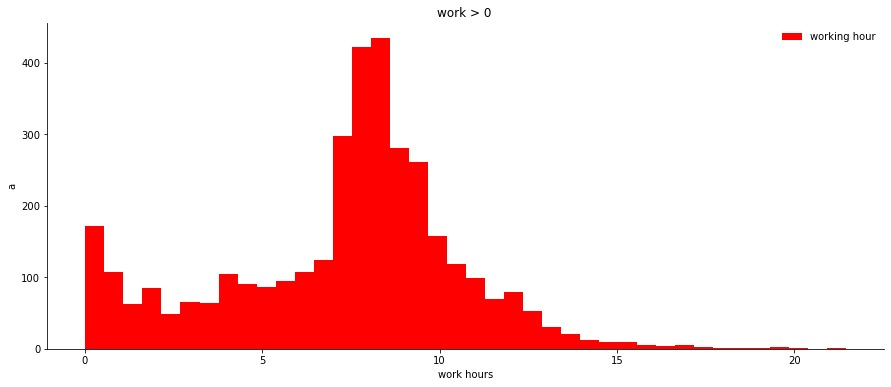

In [24]:
#5 Create a histogram of 'work' for only those observations with work>0.

atus2 = atus_small[atus_small['work'] >0]


fig, ax = plt.subplots(figsize=(15,6))

ax.hist(atus2['work'], bins=40 ,color='red', label = 'working hour')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(frameon=False)

ax.set_title('work > 0 ')
ax.set_xlabel('work hours')
ax.set_ylabel('a')

plt.show()



In [25]:
#prctice

#1
atus_small.loc[ atus_small['edu']<39, 'edu'] = 'less than high'
edu_codes = {39:'high school', 40:'some college', 41:'associate', 42:'associate', 43:'bachelor', 44:'master', 45:'prof', 46:'phd'}
atus_small['edu'] = atus_small['edu'].replace(edu_codes)


atus_small.head(3)

TypeError: '<' not supported between instances of 'str' and 'int'

2. Make sure you covered all your bases. Print out a list of the unique values in the column 'edu'.

In [ ]:
#2
educations = atus_small['edu'].unique()
educations.sort()
print(educations)

3. Apply the `minutes_to_hours` function to the `work_soc` variable. This variable is the time spent 'Socializing, relaxing, and leisure as part of job'. I have no idea what kind of jobs makes you relax and take leisure. 

In [ ]:
#3
atus_small[['work_soc']] = atus_small[['work_soc']].applymap(minutes_to_hours)
atus_small.head(10)

4. Create a column named 'work' that is the sum of 'work_main' and 'work_other'.

In [ ]:
#4
atus_small['work'] = atus_small['work_main'] + atus_small['work_other']

atus_small.head(10)

5. Create a histogram of 'work' for only those observations with work>0. 

In [ ]:
#5

fig, ax = plt.subplots(figsize=(10,6))


ax.hist(atus_small.loc[ atus_small['work']>0, 'work'], bins=40, alpha = 0.4, color = 'red')

ax.set_xlabel('hours of work')
ax.set_title('Distribution of hours worked, conditional on working at least one minute')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

### String methods
We have seen some of these before. When we learned about strings. These are analogous to the string methods in standard python, but they have been optimized for DataFrames. These *vectorized string methods*, work element-wise over an entire column. The method call looks like

```python
data['var'].str.method()
```

where `.method( )` is the method we are applying. A list of vectorized string methods is on page 218 in McKinney and in the [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#method-summary). Below, we try a few out. 

### MovieLens data set

We are going to work with the [MovieLens](https://grouplens.org/datasets/movielens/) *ml-latest-small* dataset. The GroupLens organization released this data. It is meant to help build recommendation algorithms, like the ones you see in Netflix or Spotify. \[In 2006, [Netflix started a contest](https://en.wikipedia.org/wiki/Netflix_Prize), with a $1 mil. reward, for an algorithm that could beat their own.\] They have other ratings datasets, too, on music, jokes, and books.  

I have done some preliminary work on the dataset to merge the movie title and genre data with the ratings data. \[We will learn about merging soon.\] The file is called 'movies_merged.csv'.

An observation in the data is a user's rating of a movie. There will be multiple ratings for each movie. 

In [26]:
movies = pd.read_csv('movies_merged.csv')
#movies[movies['userId']==1]
movies.sample(10)

,Unnamed: 0,movieId,title,genres,userId,rating,timestamp
93598,93598,90430,Carnage (2011),Comedy|Drama,526,5.0,1502132492
87160,87160,59315,Iron Man (2008),Action|Adventure|Sci-Fi,80,4.5,1377308725
4409,4409,153,Batman Forever (1995),Action|Adventure|Comedy|Crime,498,3.0,839196963
67346,67346,5459,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (...,Action|Comedy|Sci-Fi,361,4.0,1204046409
33562,33562,1610,"Hunt for Red October, The (1990)",Action|Adventure|Thriller,590,4.5,1258419652
11308,11308,379,Timecop (1994),Action|Sci-Fi|Thriller,380,3.0,1494035914
40775,40775,2174,Beetlejuice (1988),Comedy|Fantasy,514,4.0,1533872559
38844,38844,2046,Flight of the Navigator (1986),Adventure|Children|Sci-Fi,464,3.5,1287398842
60060,60060,4062,Mystic Pizza (1988),Comedy|Drama|Romance,558,4.0,1035416375
54228,54228,3428,"Champ, The (1979)",Drama,479,3.0,1039367349


In [27]:
movies.tail()

,Unnamed: 0,movieId,title,genres,userId,rating,timestamp
100831,100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021
100835,100835,193609,Andrew Dice Clay: Dice Rules (1991),Comedy,331,4.0,1537157606


### str.contains( )
The genres are mixed together. Let's get all the comedies. The `.contains( )` method returns a bool Series with True for observations in which the string contains the search term.

In [28]:
movies['genres'].str.contains('Comedy')

0          True
1          True
2          True
3          True
4          True
          ...  
100831     True
100832     True
100833    False
100834    False
100835     True
Name: genres, Length: 100836, dtype: bool

In [29]:
print(movies.shape)
comedies = movies[movies['genres'].str.contains('Comedy')]
print(comedies.shape)

comedies.head(4)

(100836, 7)
(39053, 7)


,Unnamed: 0,movieId,title,genres,userId,rating,timestamp
0,0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970


### str.split( )
This method splits the string up at the delimiter that is passed to split( ). It returns a list of each chunk that falls between the delimiter. 

This could be useful processing name data that come in the form: last,first or city,state. 

In [30]:
# The movie genres are separated with the '|' character. 
# Remember, DataFrames can have columns of lists...

movies['genre_split'] = movies['genres'].str.split('|')
movies.head()


,Unnamed: 0,movieId,title,genres,userId,rating,timestamp,genre_split
0,0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,"[Adventure, Animation, Children, Comedy, Fantasy]"
2,2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,"[Adventure, Animation, Children, Comedy, Fantasy]"
3,3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970,"[Adventure, Animation, Children, Comedy, Fantasy]"
4,4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,"[Adventure, Animation, Children, Comedy, Fantasy]"


In [31]:
movies.loc[0,'genre_split'][2]


'Children'

### str.join ( )
Put strings together. Separate the pieces with a delimiter of your choosing. 

In [32]:
movies['with_colons'] = movies['genre_split'].str.join('::')
movies.sample(5)


,Unnamed: 0,movieId,title,genres,userId,rating,timestamp,genre_split,with_colons
59455,59455,4018,What Women Want (2000),Comedy|Romance,82,4.0,1084466237,"[Comedy, Romance]",Comedy::Romance
36208,36208,1884,Fear and Loathing in Las Vegas (1998),Adventure|Comedy|Drama,424,3.5,1457844157,"[Adventure, Comedy, Drama]",Adventure::Comedy::Drama
2833,2833,66,Lawnmower Man 2: Beyond Cyberspace (1996),Action|Sci-Fi|Thriller,559,3.0,865096234,"[Action, Sci-Fi, Thriller]",Action::Sci-Fi::Thriller
38760,38760,2028,Saving Private Ryan (1998),Action|Drama|War,580,5.0,1167673436,"[Action, Drama, War]",Action::Drama::War
66439,66439,5312,Murder by Numbers (2002),Crime|Thriller,307,2.0,1186173238,"[Crime, Thriller]",Crime::Thriller


## Practice: What decade had the best movies?

Our data does not have a column for the year the movie was released. To answer our research question, we need to start by extracting the year from the title variable.  

Take a few minutes and try the following. Feel free to chat with those around you if you get stuck. The TA and I are here, too. 

1. Use `.str.strip()` ([docs](https://pandas.pydata.org/pandas-docs/version/0.24.2/reference/api/pandas.Series.str.strip.html)) to remove any leading or trailing spaces from 'title'. 
1. Extract the four-digit year from the titles and put them into a new column named 'year'.  

Notice that the year, including the parentheses is always the last 6 digits of the title. You might try `str.slice()` and work with negative indexes to count from the end of 'title'. 

If there is any extra space at the end of a title, it will mess up my algorithm! That's why we strip the extra spaces first. 

In [33]:
#1
movie2 = movies
movie2.head(2)

,Unnamed: 0,movieId,title,genres,userId,rating,timestamp,genre_split,with_colons
0,0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,"[Adventure, Animation, Children, Comedy, Fantasy]",Adventure::Animation::Children::Comedy::Fantasy
1,1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,"[Adventure, Animation, Children, Comedy, Fantasy]",Adventure::Animation::Children::Comedy::Fantasy


In [34]:
movie2['title'] = movie2['title'].str.strip()
movie2.head(2)

,Unnamed: 0,movieId,title,genres,userId,rating,timestamp,genre_split,with_colons
0,0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,"[Adventure, Animation, Children, Comedy, Fantasy]",Adventure::Animation::Children::Comedy::Fantasy
1,1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,"[Adventure, Animation, Children, Comedy, Fantasy]",Adventure::Animation::Children::Comedy::Fantasy


In [36]:
#2
movie2['year'] = movie2['title'].str.slice(-5, -1)
movie2.head(2)

,Unnamed: 0,movieId,title,genres,userId,rating,timestamp,genre_split,with_colons,year
0,0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,"[Adventure, Animation, Children, Comedy, Fantasy]",Adventure::Animation::Children::Comedy::Fantasy,1995
1,1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,"[Adventure, Animation, Children, Comedy, Fantasy]",Adventure::Animation::Children::Comedy::Fantasy,1995


3. There are 12 movies that do not have a year in their title. Assign the string 'no data' to those. You might try the `str.isdigit()` method to see if the year you extracted in step 2. is numeric. 

In [38]:
#3

movie2.loc[~movie2['year'].str.isdigit(), 'year'] = 'no data'

movie2.sample(10)

,Unnamed: 0,movieId,title,genres,userId,rating,timestamp,genre_split,with_colons,year
84902,84902,52973,Knocked Up (2007),Comedy|Drama|Romance,141,3.0,1513132264,"[Comedy, Drama, Romance]",Comedy::Drama::Romance,2007
69173,69173,5952,"Lord of the Rings: The Two Towers, The (2002)",Adventure|Fantasy,522,2.5,1253345717,"[Adventure, Fantasy]",Adventure::Fantasy,2002
37717,37717,1997,"Exorcist, The (1973)",Horror|Mystery,387,4.0,1094877135,"[Horror, Mystery]",Horror::Mystery,1973
38615,38615,2028,Saving Private Ryan (1998),Action|Drama|War,95,5.0,1043339248,"[Action, Drama, War]",Action::Drama::War,1998
50666,50666,3006,"Insider, The (1999)",Drama|Thriller,271,4.0,1234301749,"[Drama, Thriller]",Drama::Thriller,1999
72375,72375,6807,Monty Python's The Meaning of Life (1983),Comedy,580,3.0,1167791285,[Comedy],Comedy,1983
74076,74076,7158,House of Sand and Fog (2003),Drama,381,4.5,1199054385,[Drama],Drama,2003
6301,6301,231,Dumb & Dumber (Dumb and Dumber) (1994),Adventure|Comedy,543,5.0,1377069313,"[Adventure, Comedy]",Adventure::Comedy,1994
28457,28457,1266,Unforgiven (1992),Drama|Western,28,4.5,1234338735,"[Drama, Western]",Drama::Western,1992
36788,36788,1924,Plan 9 from Outer Space (1959),Horror|Sci-Fi,520,3.0,1326610830,"[Horror, Sci-Fi]",Horror::Sci-Fi,1959


We now need to work on getting the movies classified by decade. Let's learn about 'binning' and then we will come back to our movie data in the last round of practice problems. 

### Binning: cut( )

We return to the **time use data** to learn about binning. In the next set of practice problems we will finish our work on the movie data. 

Often we would like to take a continuous variable and make it discrete. One way to do this is to place the data into 'bins' or 'buckets'. (This is implicitly being done when we create a histogram.) Pandas has a nice facility for this. 

In [39]:
# What range are the ages?
atus_small['age'].describe()

count    10223.000000
mean        49.876846
std         18.008395
min         15.000000
25%         35.000000
50%         50.000000
75%         64.000000
max         85.000000
Name: age, dtype: float64

The ages range from 15 to 85. Let's group observations (people) into bins with 10-year widths. 

In [40]:
# These are the endpoints for the bins
# bins = [15, 25, 35, 45, 55, 65, 75]  
bins = list( range(15, 76, 10) )

atus_small['age_bin'] = pd.cut(atus_small['age'], bins)


In [41]:
atus_small.head(10)

,age,gender,race,edu,metro,employ,day,work_main,work_other,work_soc,sleep,no_sleep,work,age_bin
0,34,female,black,high school,1,1,1,7.50,0.000000,0.0,12.133333,0.0,7.500000,"(25.0, 35.0]"
1,28,female,white,some college,1,5,7,0.00,0.000000,0.0,6.416667,0.0,0.000000,"(25.0, 35.0]"
2,15,male,native_am,less than high,1,5,4,0.00,0.000000,0.0,9.500000,0.0,0.000000,NaN
3,46,male,white,high school,1,1,2,8.00,0.000000,0.0,8.750000,0.0,8.000000,"(45.0, 55.0]"
4,85,male,white,master,1,1,7,0.00,0.000000,0.0,12.600000,0.0,0.000000,NaN
5,60,male,white,less than high,1,1,7,0.00,0.000000,0.0,9.750000,0.0,0.000000,"(55.0, 65.0]"
6,44,male,white,high school,2,1,2,8.25,0.000000,0.0,5.750000,0.0,8.250000,"(35.0, 45.0]"
7,49,female,black,bachelor,1,1,3,0.00,7.433333,0.0,6.500000,0.0,7.433333,"(45.0, 55.0]"
8,63,male,white,some college,1,1,1,1.50,0.000000,0.0,7.666667,0.0,1.500000,"(55.0, 65.0]"
9,70,female,white,master,1,5,6,0.00,0.000000,0.0,8.000000,0.0,0.000000,"(65.0, 75.0]"


I appreciate the bin notation: The open and closed ends of the interval are clearly indicated. 

Notice the NaN for observation 2. Our lowest bin starts at 15, but it is open on the left end point &mdash; 15 is not included in the bin. We could set the bottom interval to 14 to catch this observation. We have a similar problem with observation 4.

What bins do we have? What type is 'age_bin'? Let's check the `dtype` of 'age_bin'.

In [ ]:
atus_small['age_bin'].dtypes

We have a new type: Categorical. Here we see what categories are available. 

I want to include that 15-year old in a bin. Let me change the lowest bin edge.  

In [42]:
# These are the endpoints for the bins.
bins =  list(range(14, 76, 10))
atus_small['age_bin'] = pd.cut(atus_small['age'], bins)
atus_small.head(10)

,age,gender,race,edu,metro,employ,day,work_main,work_other,work_soc,sleep,no_sleep,work,age_bin
0,34,female,black,high school,1,1,1,7.50,0.000000,0.0,12.133333,0.0,7.500000,"(24.0, 34.0]"
1,28,female,white,some college,1,5,7,0.00,0.000000,0.0,6.416667,0.0,0.000000,"(24.0, 34.0]"
2,15,male,native_am,less than high,1,5,4,0.00,0.000000,0.0,9.500000,0.0,0.000000,"(14.0, 24.0]"
3,46,male,white,high school,1,1,2,8.00,0.000000,0.0,8.750000,0.0,8.000000,"(44.0, 54.0]"
4,85,male,white,master,1,1,7,0.00,0.000000,0.0,12.600000,0.0,0.000000,NaN
5,60,male,white,less than high,1,1,7,0.00,0.000000,0.0,9.750000,0.0,0.000000,"(54.0, 64.0]"
6,44,male,white,high school,2,1,2,8.25,0.000000,0.0,5.750000,0.0,8.250000,"(34.0, 44.0]"
7,49,female,black,bachelor,1,1,3,0.00,7.433333,0.0,6.500000,0.0,7.433333,"(44.0, 54.0]"
8,63,male,white,some college,1,1,1,1.50,0.000000,0.0,7.666667,0.0,1.500000,"(54.0, 64.0]"
9,70,female,white,master,1,5,6,0.00,0.000000,0.0,8.000000,0.0,0.000000,"(64.0, 74.0]"


We could also make the bins closed on the left and open on the right by passing `'right=False'` parameter to `cut( )`. 

In [43]:
# These are the endpoints for the bins
#bins = [15, 25, 35, 45, 55, 65, 75] 
bins = list(range(15, 76, 10))
atus_small['age_bin'] = pd.cut(atus_small['age'], bins, right=False)
atus_small.head(10)

,age,gender,race,edu,metro,employ,day,work_main,work_other,work_soc,sleep,no_sleep,work,age_bin
0,34,female,black,high school,1,1,1,7.50,0.000000,0.0,12.133333,0.0,7.500000,"[25.0, 35.0)"
1,28,female,white,some college,1,5,7,0.00,0.000000,0.0,6.416667,0.0,0.000000,"[25.0, 35.0)"
2,15,male,native_am,less than high,1,5,4,0.00,0.000000,0.0,9.500000,0.0,0.000000,"[15.0, 25.0)"
3,46,male,white,high school,1,1,2,8.00,0.000000,0.0,8.750000,0.0,8.000000,"[45.0, 55.0)"
4,85,male,white,master,1,1,7,0.00,0.000000,0.0,12.600000,0.0,0.000000,NaN
5,60,male,white,less than high,1,1,7,0.00,0.000000,0.0,9.750000,0.0,0.000000,"[55.0, 65.0)"
6,44,male,white,high school,2,1,2,8.25,0.000000,0.0,5.750000,0.0,8.250000,"[35.0, 45.0)"
7,49,female,black,bachelor,1,1,3,0.00,7.433333,0.0,6.500000,0.0,7.433333,"[45.0, 55.0)"
8,63,male,white,some college,1,1,1,1.50,0.000000,0.0,7.666667,0.0,1.500000,"[55.0, 65.0)"
9,70,female,white,master,1,5,6,0.00,0.000000,0.0,8.000000,0.0,0.000000,"[65.0, 75.0)"


We are still missing observation 4. That person is 85 years old and our largest bin only goes to 75.

If we do not need specific bin endpoints, we can let `.cut( )` create bins for us. Pass `.cut()` an integer and get back that many equally-sized bins that span the range of the data, so all observations are included. The `precision` parameter determines how many decimal places are used in the bin edges. 

In [44]:
# Tell .cut() to make three bins. It will choose the end points. 
atus_small['age_bin'] = pd.cut(atus_small['age'], bins = 3, precision = 0)
atus_small.head(10)

,age,gender,race,edu,metro,employ,day,work_main,work_other,work_soc,sleep,no_sleep,work,age_bin
0,34,female,black,high school,1,1,1,7.50,0.000000,0.0,12.133333,0.0,7.500000,"(15.0, 38.0]"
1,28,female,white,some college,1,5,7,0.00,0.000000,0.0,6.416667,0.0,0.000000,"(15.0, 38.0]"
2,15,male,native_am,less than high,1,5,4,0.00,0.000000,0.0,9.500000,0.0,0.000000,"(15.0, 38.0]"
3,46,male,white,high school,1,1,2,8.00,0.000000,0.0,8.750000,0.0,8.000000,"(38.0, 62.0]"
4,85,male,white,master,1,1,7,0.00,0.000000,0.0,12.600000,0.0,0.000000,"(62.0, 85.0]"
5,60,male,white,less than high,1,1,7,0.00,0.000000,0.0,9.750000,0.0,0.000000,"(38.0, 62.0]"
6,44,male,white,high school,2,1,2,8.25,0.000000,0.0,5.750000,0.0,8.250000,"(38.0, 62.0]"
7,49,female,black,bachelor,1,1,3,0.00,7.433333,0.0,6.500000,0.0,7.433333,"(38.0, 62.0]"
8,63,male,white,some college,1,1,1,1.50,0.000000,0.0,7.666667,0.0,1.500000,"(62.0, 85.0]"
9,70,female,white,master,1,5,6,0.00,0.000000,0.0,8.000000,0.0,0.000000,"(62.0, 85.0]"


In [45]:
# What are my bins?
atus_small['age_bin'].dtypes

CategoricalDtype(categories=[(15.0, 38.0], (38.0, 62.0], (62.0, 85.0]],
, ordered=True)

In [46]:
# How many observations in each bin?
pd.value_counts(atus_small['age_bin'])

(38.0, 62.0]    4033
(15.0, 38.0]    3176
(62.0, 85.0]    3014
Name: age_bin, dtype: int64

### Quantiles: qcut( )
Notice that the bins are equally spaced from the smallest to the largest values of age. The number of observations in each is not equal. 

The method `.qcut( )` splits the data according to the sample quantiles. This should get you bins of approximately equal numbers of observations. 

In [47]:
# Create quartiles (4 bins) based on age
atus_small['age_bin'] = pd.qcut(atus_small['age'], q = 4)  
atus_small.head(10)

,age,gender,race,edu,metro,employ,day,work_main,work_other,work_soc,sleep,no_sleep,work,age_bin
0,34,female,black,high school,1,1,1,7.50,0.000000,0.0,12.133333,0.0,7.500000,"(14.999, 35.0]"
1,28,female,white,some college,1,5,7,0.00,0.000000,0.0,6.416667,0.0,0.000000,"(14.999, 35.0]"
2,15,male,native_am,less than high,1,5,4,0.00,0.000000,0.0,9.500000,0.0,0.000000,"(14.999, 35.0]"
3,46,male,white,high school,1,1,2,8.00,0.000000,0.0,8.750000,0.0,8.000000,"(35.0, 50.0]"
4,85,male,white,master,1,1,7,0.00,0.000000,0.0,12.600000,0.0,0.000000,"(64.0, 85.0]"
5,60,male,white,less than high,1,1,7,0.00,0.000000,0.0,9.750000,0.0,0.000000,"(50.0, 64.0]"
6,44,male,white,high school,2,1,2,8.25,0.000000,0.0,5.750000,0.0,8.250000,"(35.0, 50.0]"
7,49,female,black,bachelor,1,1,3,0.00,7.433333,0.0,6.500000,0.0,7.433333,"(35.0, 50.0]"
8,63,male,white,some college,1,1,1,1.50,0.000000,0.0,7.666667,0.0,1.500000,"(50.0, 64.0]"
9,70,female,white,master,1,5,6,0.00,0.000000,0.0,8.000000,0.0,0.000000,"(64.0, 85.0]"


In [48]:
pd.value_counts(atus_small['age_bin']).sort_index()  # How many observations in each bin?

(14.999, 35.0]    2560
(35.0, 50.0]      2644
(50.0, 64.0]      2517
(64.0, 85.0]      2502
Name: age_bin, dtype: int64

Note that these are not perfectly equal in obersvations because some values near the boundry appear several times. 

## Practice, continued

We return to our movie data to answer the question: What decade had the best movies? If needed, you should re-run your solutions to the previous practice problems so that you have the DataFrame 'movies' ready to go.

We have extracted the release year from the title data and created a variable named 'year'. Let's keep going. 

3. Drop the movies without years.
4. Convert the year data to int (they are strings right now). You might try `.astype()`. 

In [53]:
#3
movie3 = movie2[ movie2['year']!='no data' ] 
movie3['year'] = movie3['year'].astype(int)

movie3.sample(10)

<ipython-input-53-e6621079161f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie3['year'] = movie3['year'].astype(int)


,Unnamed: 0,movieId,title,genres,userId,rating,timestamp,genre_split,with_colons,year
35518,35518,1767,Music From Another Room (1998),Drama|Romance,474,2.0,1014924230,"[Drama, Romance]",Drama::Romance,1998
20625,20625,912,Casablanca (1942),Drama|Romance,249,4.5,1410001922,"[Drama, Romance]",Drama::Romance,1942
19428,19428,802,Phenomenon (1996),Drama|Romance,337,5.0,860255866,"[Drama, Romance]",Drama::Romance,1996
50900,50900,3034,Robin Hood (1973),Adventure|Animation|Children|Comedy|Musical,590,3.5,1258426903,"[Adventure, Animation, Children, Comedy, Musical]",Adventure::Animation::Children::Comedy::Musical,1973
54785,54785,3489,Hook (1991),Adventure|Comedy|Fantasy,64,3.0,1161559689,"[Adventure, Comedy, Fantasy]",Adventure::Comedy::Fantasy,1991
49708,49708,2949,Dr. No (1962),Action|Adventure|Thriller,202,4.0,974921308,"[Action, Adventure, Thriller]",Action::Adventure::Thriller,1962
784,784,11,"American President, The (1995)",Comedy|Drama|Romance,357,3.5,1348612270,"[Comedy, Drama, Romance]",Comedy::Drama::Romance,1995
19931,19931,858,"Godfather, The (1972)",Crime|Drama,313,5.0,1030476347,"[Crime, Drama]",Crime::Drama,1972
20750,20750,914,My Fair Lady (1964),Comedy|Drama|Musical|Romance,488,4.5,1112382276,"[Comedy, Drama, Musical, Romance]",Comedy::Drama::Musical::Romance,1964
47793,47793,2762,"Sixth Sense, The (1999)",Drama|Horror|Mystery,409,2.0,968978439,"[Drama, Horror, Mystery]",Drama::Horror::Mystery,1999


5. 'Bin' the years into decades (1900-1910; 1910-1920; 1920-1930;...2010-2020) using `.cut()`. Create a column called 'decade' to store the categories.

In [60]:
#5
binmovie = list( range(1900, 2021, 10) )
movie3['decade'] = pd.cut(movie3['year'], binmovie)

movie3.head(2)

<ipython-input-60-c144e66435ef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie3['decade'] = pd.cut(movie3['year'], binmovie)


,Unnamed: 0,movieId,title,genres,userId,rating,timestamp,genre_split,with_colons,year,decade
0,0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,"[Adventure, Animation, Children, Comedy, Fantasy]",Adventure::Animation::Children::Comedy::Fantasy,1995,"(1990, 2000]"
1,1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,"[Adventure, Animation, Children, Comedy, Fantasy]",Adventure::Animation::Children::Comedy::Fantasy,1995,"(1990, 2000]"


7. Use `.groupby()` to compute the mean rating by decade. 

In [62]:
#7
movie_median = movie3[['decade','rating']].groupby('decade').median()
movie_median

,rating
decade,
"(1900, 1910]",3.5
"(1910, 1920]",3.5
"(1920, 1930]",4.0
"(1930, 1940]",4.0
"(1940, 1950]",4.0
"(1950, 1960]",4.0
"(1960, 1970]",4.0
"(1970, 1980]",4.0
"(1980, 1990]",3.5


According to Wikipedia (I know nothing about movies) the [Golden Age of Hollywood](https://en.wikipedia.org/wiki/Cinema_of_the_United_States#Classical_Hollywood_cinema_and_the_Golden_Age_of_Hollywood_(1917%E2%80%931960)) started in the late 1920s and ended in the 1960s. 

The ratings data seem to support this.

**Extra**: If you have finished the Friday notebook on bar and scatter plots, try making a bar graph of the average ratings. You will need to turn the categorical object values into strings for the labels. Try out this code: 

```python
means.index.astype(str)
```